In [1]:
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import nibabel
import numpy as np

from dpipe.im.visualize import slice3d
from skimage import measure

# GBM

In [14]:
folder = Path('/anvar/public_datasets/preproc_study/gbm/2a_interp')

In [15]:
patient = 'TCGA-06-0188'

In [16]:
img_t1c = nibabel.load(folder / patient / 'CT1.nii.gz').get_fdata()
img_flair = nibabel.load(folder / patient / 'FLAIR.nii.gz').get_fdata()
img_t1 = nibabel.load(folder / patient / 'T1.nii.gz').get_fdata()
img_t2 = nibabel.load(folder / patient / 'T2.nii.gz').get_fdata()
img_seg = nibabel.load(folder / patient / 'CT1_SEG.nii.gz').get_fdata()

# CT1.nii.gz  CT1_SEG.nii.gz  FLAIR.nii.gz  T1.nii.gz  T2.nii.gz
# 46

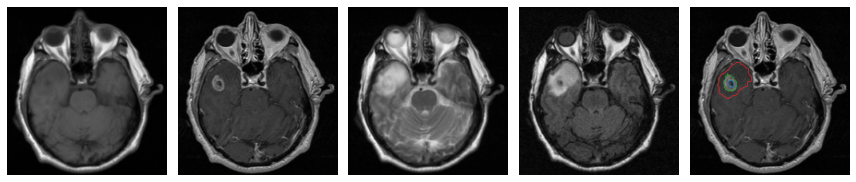

In [18]:
fig, axs = plt.subplots(1, 5, figsize=(12, 4))

def get_contours(seg):
    contours = measure.find_contours(seg, 2)
    c = measure.find_contours(seg, 0)[0]
    contours.append(c)
    return contours

i = 46
xi_start = 10
xi_end = 220
yi_start = 30
yi_end = 230

axs[0].imshow(img_t1[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end], cmap='gray')
axs[1].imshow(img_t1c[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end], cmap='gray')
axs[2].imshow(img_t2[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end], cmap='gray')
axs[3].imshow(img_flair[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end], cmap='gray')
axs[4].imshow(img_t1c[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end], cmap='gray')


seg = img_seg[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end]
contours = get_contours(seg)

for c, color in zip(contours, ['tab:green','tab:blue','tab:red']):
    axs[4].plot(c[:, 1], c[:, 0], c=color, alpha=1, lw=0.7)

for ax in axs.flatten():
    ax.set_axis_off()

plt.tight_layout()
plt.savefig('../figures/gbm_4_with_contours.png', dpi=300)

In [19]:
!pwd

/home/anvar/projects/brain-mri-processing-pipeline/figures_ipynb


# BGPD

In [6]:
root = Path('/anvar/public_datasets/preproc_study/bgpd/4a_resamp/')

patient ='Patient_98814'# 'Patient_62817'

In [7]:
img_t1c = nibabel.load(root / patient / 'CT1.nii.gz').get_fdata()
img_flair = nibabel.load(root / patient / 'FLAIR.nii.gz').get_fdata()
img_t1 = nibabel.load(root / patient / 'T1.nii.gz').get_fdata()
img_t2 = nibabel.load(root / patient / 'T2.nii.gz').get_fdata()
img_seg = nibabel.load(root / patient / 'mask_GTV_FLAIR.nii.gz').get_fdata()

In [8]:
# vol = dict()
# for patient in root.glob('*'):
#     mask = nibabel.load(root / patient / 'mask_GTV_FLAIR.nii.gz').get_fdata()
#     vol[patient.name] = mask.sum()
# sorted(vol.items(), key=lambda x: x[1])

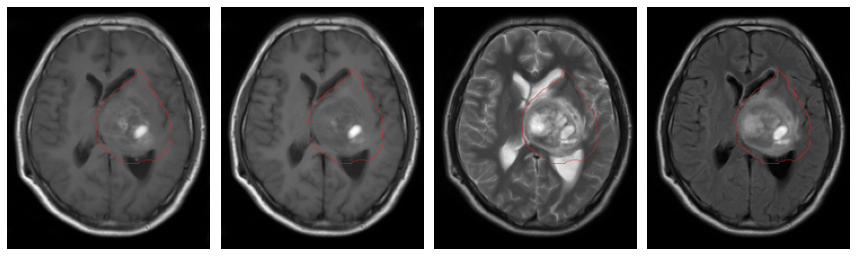

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

i = 57
xi_start = 15
xi_end = 230
yi_start = 25
yi_end = 205

axs[0].imshow(img_t1[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end], cmap='gray')
axs[1].imshow(img_t1c[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end], cmap='gray')
axs[2].imshow(img_t2[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end], cmap='gray')
axs[3].imshow(img_flair[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end], cmap='gray')

seg = img_seg[..., i].T[::-1][xi_start:xi_end, yi_start:yi_end]
c = measure.find_contours(seg)[0]

for i,ax in enumerate(axs.flatten()):
    ax.plot(c[:, 1], c[:, 0], c='tab:red', alpha=.7, lw=0.7)

for ax in axs.flatten():
    ax.set_axis_off()

plt.tight_layout()
plt.savefig('../figures/bgpd_4_with_contours.png', dpi=300)

# Susan Diff

In [10]:
from tqdm import tqdm

In [11]:
# root1 = Path('/anvar/public_datasets/preproc_study/bgpd/4a_resamp/')
# root2 = Path('/anvar/public_datasets/preproc_study/bgpd/4d_susan')
# diff = dict()

# for subj in tqdm(root1.glob('*')):
#     name = subj.name
#     img = nibabel.load(subj / 'T1.nii.gz').get_fdata()
#     img_susan = nibabel.load(root2 / name / 'T1.nii.gz').get_fdata()
    
#     diff[name] = (img - img_susan).sum()
# sorted(diff.items(), key=lambda x: x[1])

In [12]:
# patient = 'Patient_69515'
# img1 = nibabel.load(root1 / patient / 'T1.nii.gz').get_fdata()
# img2 = nibabel.load(root2 / patient / 'T1.nii.gz').get_fdata()

In [13]:
# slice3d(img1, img2, img1-img2)